#### Name :- Abhishek Ajay Avati
#### Rollno:-33106
#### Batch :-M-9
#### ps
Download the following customer dataset from below link:

Data Set: https://www.kaggle.com/shwetabh123/mall-customers

This dataset gives the data of Income and money spent by the customers visiting a Shopping Mall. The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as a mall owner you need to find the group of people who are the profitable customers for the mall owner. Apply at least two clustering algorithms (based on Spending Score) to find the group of customers.



a. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary.

b. Perform data-preparation( Train-Test Split)

c. Apply Machine Learning Algorithm

d. Evaluate Model.

e. Apply Cross-Validation and Evaluate Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import random as rd

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
print(data)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [4]:
data=data.rename(columns={'Genre': 'Gender'})
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.shape

(200, 5)

In [6]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

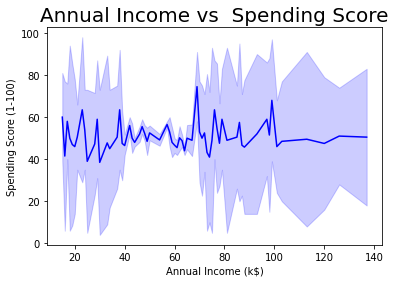

In [8]:
import warnings
warnings.filterwarnings('ignore')
x = data['Annual Income (k$)']
y = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
plt.title('Annual Income vs  Spending Score', fontsize = 20)
plt.show()
# Plot Between Annual Income and Age represented by a blue color line, 
# and a plot between Annual Income and the Spending Score represented by a pink color. 
# shows how Age and Spending Varies with Annual Income.

In [9]:
size = data['Gender'].value_counts()
size

Female    112
Male       88
Name: Gender, dtype: int64

In [10]:
x = data.iloc[:, [3, 4]].values

print(x.shape)

(200, 2)


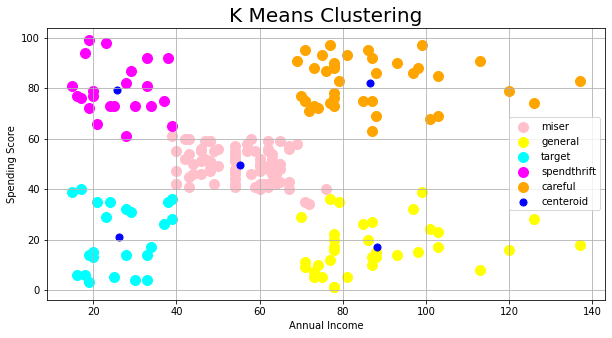

In [11]:
from sklearn.cluster import KMeans
# visualizing the cluster

# n_init:int, default=10
# Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.

# max_iter:int, default=300
# Maximum number of iterations of the k-means algorithm for a single run.
km = KMeans(n_clusters = 5, init = 'k-means++',random_state = 42)
y_means = km.fit_predict(x)

plt.figure(figsize=(10,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

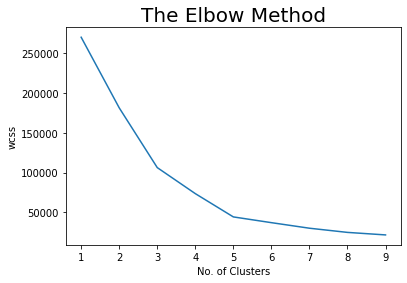

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


## Hierarchial Clustering 

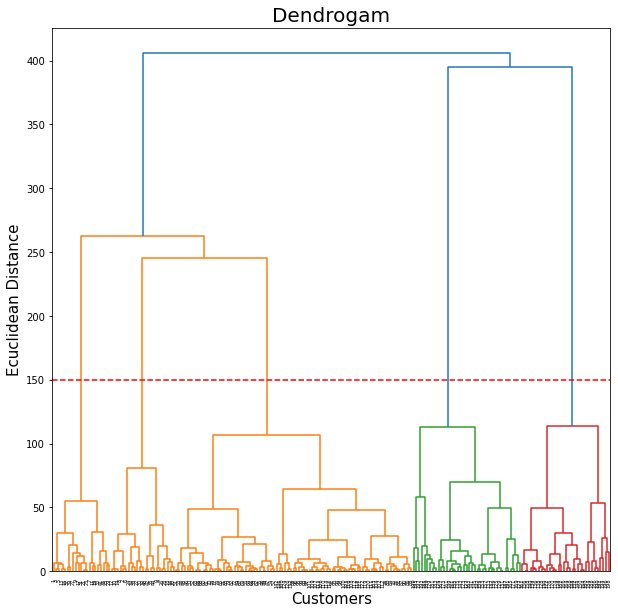

In [13]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.axhline(y=150, color='r', linestyle='--')
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers',fontsize = 15)
plt.ylabel('Ecuclidean Distance',fontsize = 15)
plt.show()

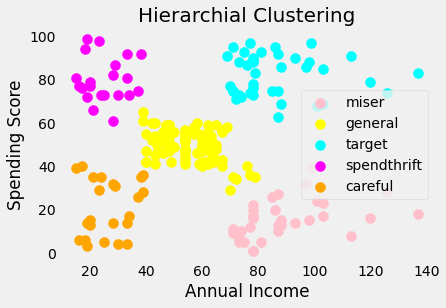

In [16]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')


plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()